## Decision Tree - Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


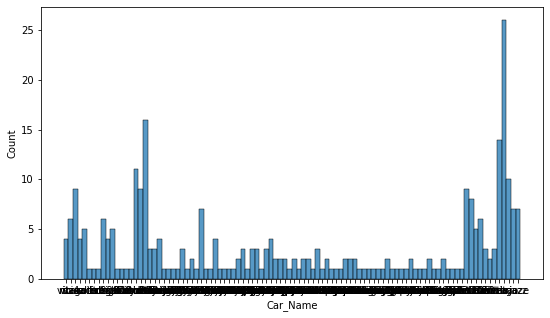

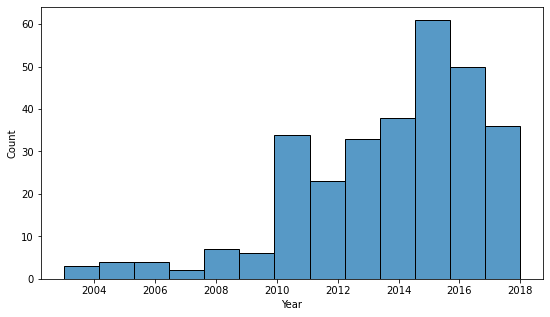

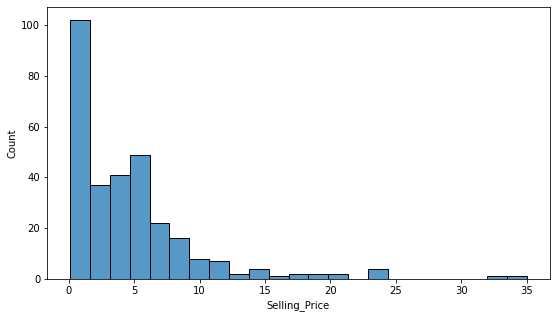

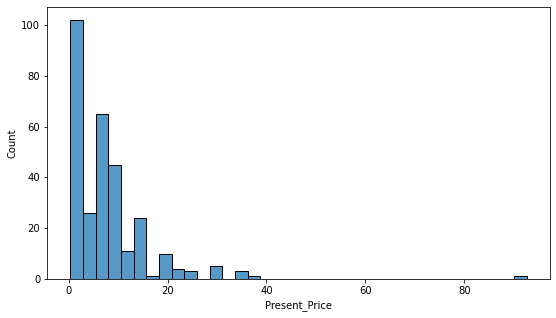

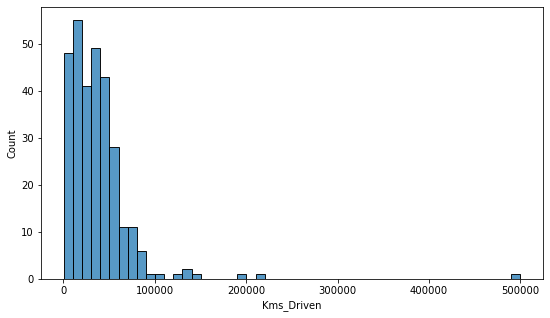

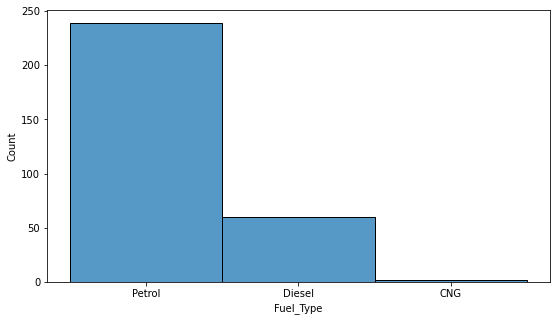

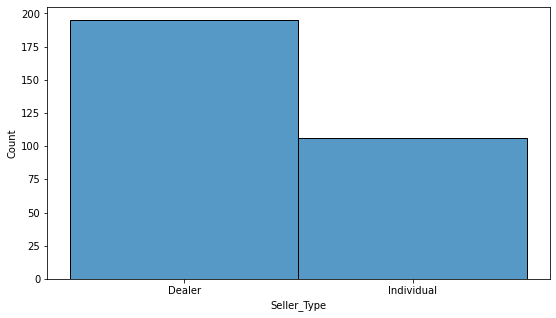

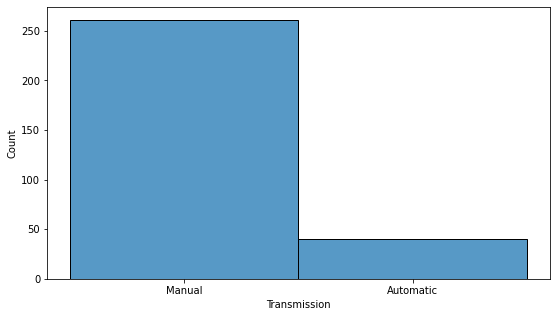

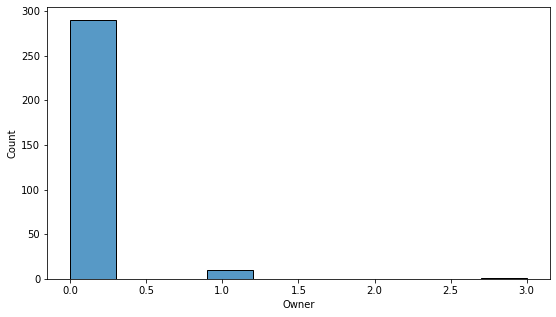

In [7]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

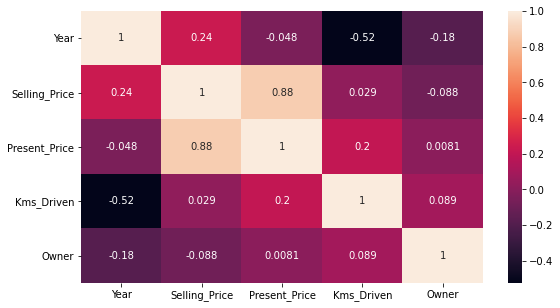

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df["vehicle_age"]=2021-df.Year

In [11]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
i20                           9
innova                        9
grand i10                     8
jazz                          7
Royal Enfield Classic 350     7
amaze                         7
sx4                           6
eon                           6
ertiga                        6
i10                           5
alto k10                      5
swift                         5
ritz                          4
wagon r                       4
etios liva                    4
Bajaj Pulsar 150              4
dzire                         4
Royal Enfield Thunder 350     4
Yamaha FZ S V 2.0             3
xcent                         3
Honda CB Hornet 160R          3
Royal Enfield Thunder 500     3
etios g                       3
Bajaj Avenger 220             3
creta                         3
Bajaj Pu

In [12]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [13]:
df=pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## Train test split

In [15]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling

In [17]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [18]:
DT_model = DecisionTreeRegressor(random_state=101)

In [19]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [20]:
y_pred = DT_model.predict(X_test)
y_train_pred = DT_model.predict(X_train)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [23]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,1.0,0.942586
mae,0.0,0.704754
mse,0.0,1.541048
rmse,0.0,1.241389


In [ ]:
# skorlarım ne kadar birbirine yakın olsada, regresyon da r2 nin 100 olması çok zor. overfitting var. 

In [24]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =5)
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.016983,0.012995,0.865015,-0.798958,-1.535040,-1.238967
1,0.014981,0.009998,0.936649,-0.675000,-1.509471,-1.228605
2,0.004995,0.009995,0.750832,-0.998750,-6.154233,-2.480773
3,0.007004,0.014990,0.892178,-1.050833,-3.760500,-1.939201
4,0.026980,0.019987,0.687158,-1.026875,-10.078044,-3.174593


In [25]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.826366
test_neg_mean_absolute_error       -0.910083
test_neg_mean_squared_error        -4.607458
test_neg_root_mean_squared_error   -2.012428
dtype: float64

In [26]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,1.0,0.942586
mae,0.0,0.704754
mse,0.0,1.541048
rmse,0.0,1.241389


## Visualizing trees

In [27]:
from sklearn.tree import plot_tree

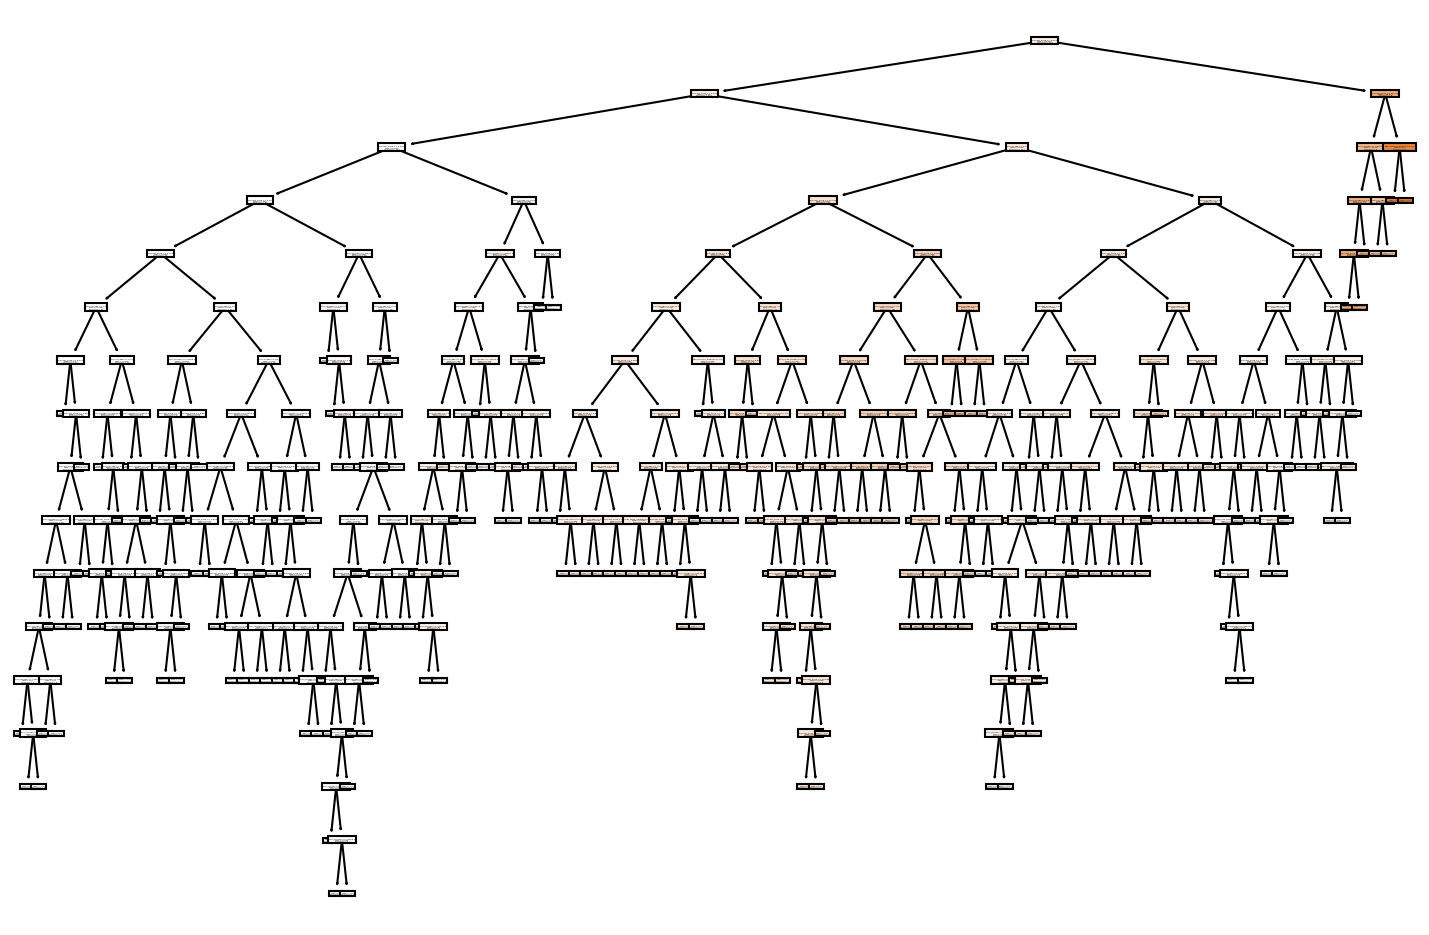

In [28]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(DT_model, filled=True, feature_names=X.columns);

In [29]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(y_train, y_train_pred, y_test, y_pred))
    print('\n')
    plt.figure(figsize=(12,8),dpi=300)
    plot_tree(model,filled=True, feature_names=X.columns);

In [42]:
pruned_tree = DecisionTreeRegressor(max_depth=3, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=101)



      train_set  test_set
R2     0.871127  0.783878
mae    1.105847  1.540649
mse    3.277820  5.800869
rmse   1.810475  2.408499




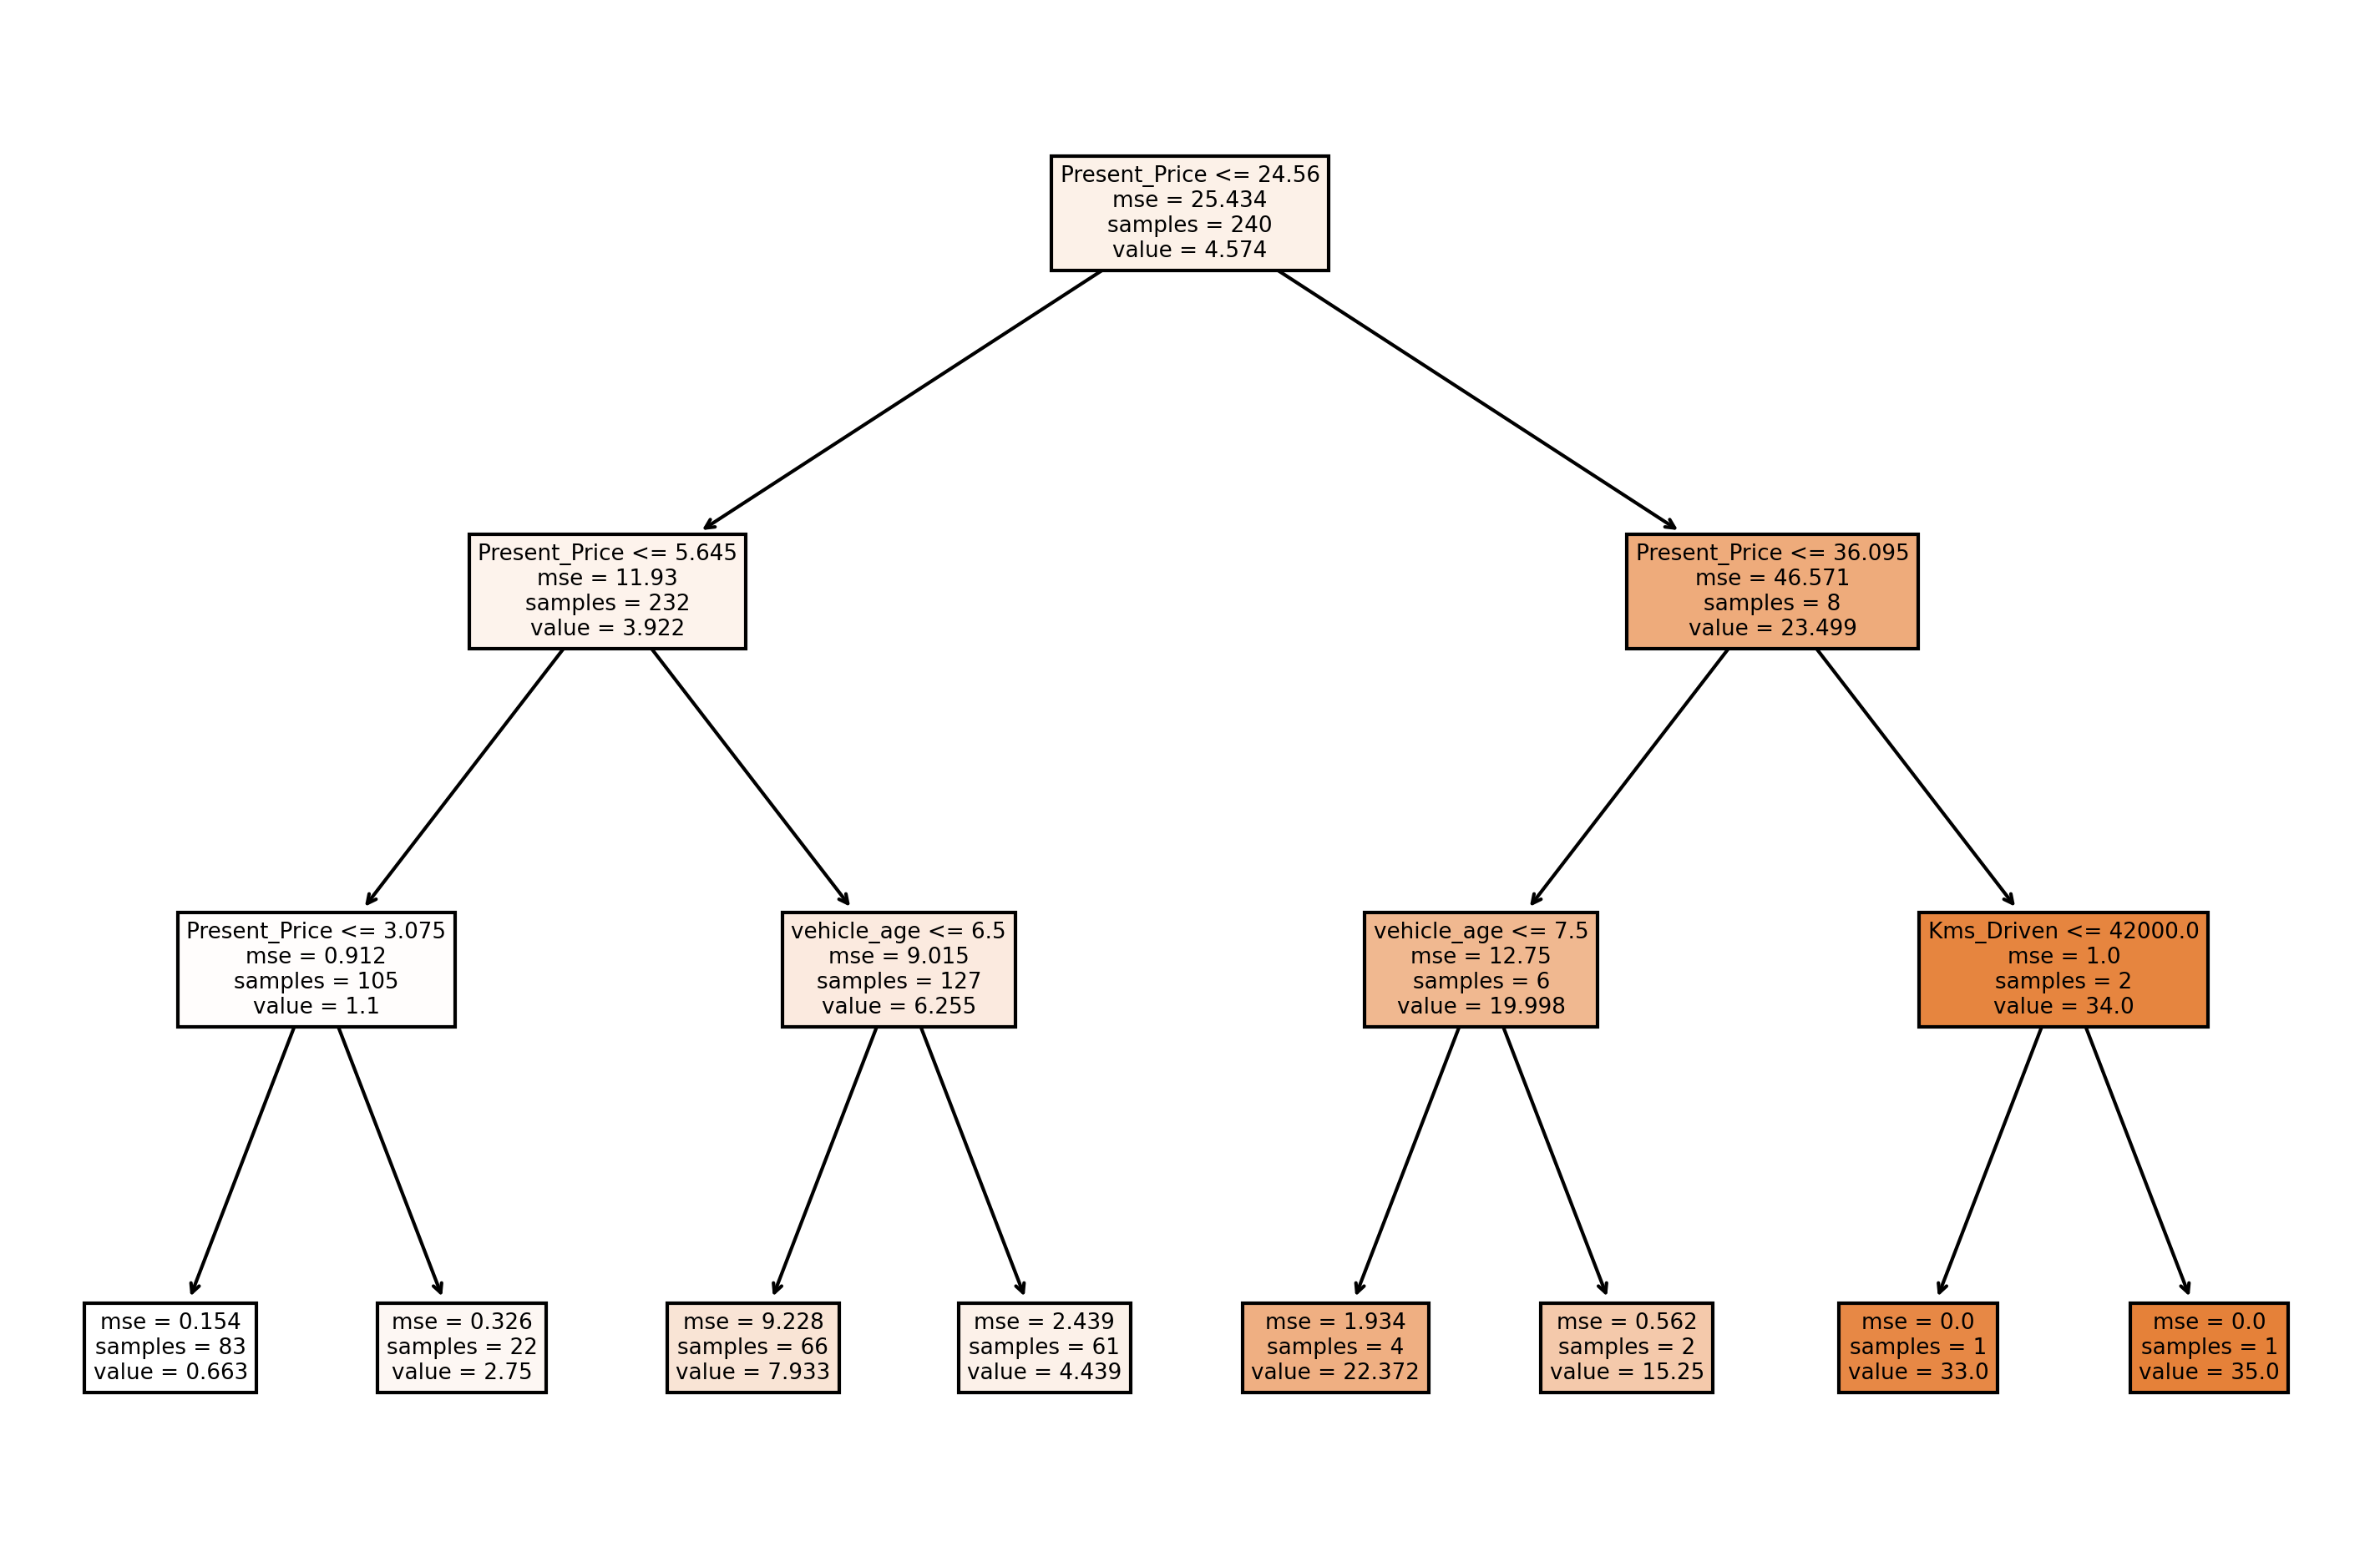

In [43]:
report_model(pruned_tree)

## GridSearch

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
model = DecisionTreeRegressor(random_state=101)

In [46]:
param_grid = {"splitter":["best", "random"],
            "max_depth": [None, 4, 5, 6, 7,8,9,10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
             "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [47]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [48]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [49]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_split=7, random_state=101)

In [50]:
grid_model.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'best'}

In [51]:
grid_score =pd.DataFrame(grid_model.cv_results_)
grid_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009794,1.886028e-03,0.005397,0.000917,None,1,2,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.866730,-1.148307,-1.562563,-0.604321,-3.377139,-0.928532,-2.377967,-1.170984,-1.306945,-1.044156,-1.438764,0.791691,7
1,0.005996,1.263257e-03,0.003498,0.000500,None,1,2,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-1.004272,-0.775427,-2.984152,-1.591926,-2.145708,-1.447586,-3.557152,-0.786082,-0.398649,-4.369908,-1.906086,1.262673,231
2,0.006194,1.329694e-03,0.003498,0.000671,None,1,3,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.868025,-1.136702,-1.539658,-0.764768,-3.656520,-1.098483,-2.484616,-1.155513,-1.399967,-0.907673,-1.501192,0.856405,12
3,0.006697,1.552138e-03,0.003798,0.000600,None,1,3,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-1.689397,-1.142804,-2.705761,-1.125360,-2.567831,-2.175479,-3.904847,-0.828821,-0.997053,-4.238386,-2.137574,1.152158,451
4,0.005896,1.043602e-03,0.003598,0.000490,None,1,5,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.784587,-1.059755,-2.109169,-0.744268,-3.660894,-0.962344,-2.662130,-1.065130,-1.322418,-0.917490,-1.528818,0.922420,15
5,0.005397,9.161530e-04,0.003198,0.000747,None,1,5,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-1.240390,-1.148949,-2.828630,-1.741955,-3.588684,-2.165832,-3.385514,-1.122575,-1.348627,-6.489925,-2.506108,1.591154,684
6,0.006697,8.994031e-04,0.003598,0.000491,None,1,6,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.655147,-1.262552,-3.539843,-0.699470,-3.633202,-1.073780,-3.146107,-1.032690,-1.306700,-0.958924,-1.730842,1.141467,52
7,0.006196,9.800229e-04,0.003698,0.000640,None,1,6,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.663536,-1.317728,-3.126575,-1.709144,-0.897274,-1.580253,-3.356449,-1.124097,-0.540088,-6.469341,-2.078449,1.721905,421
8,0.006596,1.279933e-03,0.003798,0.000400,None,1,7,best,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-0.692478,-1.252800,-3.539136,-0.695838,-1.116187,-1.001527,-2.685655,-0.994064,-1.301957,-3.183532,-1.646317,1.011677,32
9,0.005997,6.323348e-04,0.004298,0.001675,None,1,7,random,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-9.028223,-1.411968,-3.128591,-1.441484,-1.206118,-1.000492,-3.246923,-0.809372,-0.441792,-3.440157,-2.515512,2.403613,688


In [52]:
grid_model.best_index_

302

In [53]:
grid_model.best_score_

-1.4096661789372227

In [54]:
y_train_pred = grid_model.predict(X_train)

In [55]:
y_pred = grid_model.predict(X_test)

In [56]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.971356,0.930021
mae,0.481615,0.738078
mse,0.728537,1.878304
rmse,0.853544,1.370512


In [57]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101,max_depth = 6, min_samples_split= 2)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.004997,0.003998,0.959892,-0.538898,-0.463179,-0.680573
1,0.004999,0.003998,0.886540,-0.749800,-1.240498,-1.113776
2,0.003997,0.003998,0.916076,-0.938230,-2.740365,-1.655405
3,0.002999,0.003998,0.944924,-0.542735,-0.684456,-0.827319
4,0.003998,0.002998,0.659354,-1.476792,-11.481774,-3.388477
5,0.003998,0.003998,0.963601,-0.458411,-0.526473,-0.725585
6,0.003998,0.002998,0.893041,-1.243723,-6.330184,-2.515986
7,0.002998,0.003999,0.870195,-0.645394,-1.092579,-1.045265
8,0.006003,0.005991,0.887375,-0.577041,-1.373038,-1.171767
9,0.006998,0.002998,0.978598,-0.675981,-1.061438,-1.030261


In [58]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.895960
test_neg_mean_absolute_error       -0.784700
test_neg_mean_squared_error        -2.699398
test_neg_root_mean_squared_error   -1.415441
dtype: float64

In [59]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.971356,0.930021
mae,0.481615,0.738078
mse,0.728537,1.878304
rmse,0.853544,1.370512


In [60]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [61]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
191,0.20,0.234667,-0.034667
222,6.00,5.200833,0.799167
230,6.15,5.200833,0.949167
234,5.50,5.540625,-0.040625
66,19.75,15.995000,3.755000
123,1.00,1.150000,-0.150000
49,7.75,8.412500,-0.662500
68,4.35,4.833333,-0.483333
265,6.50,8.412500,-1.912500
226,5.25,5.540625,-0.290625


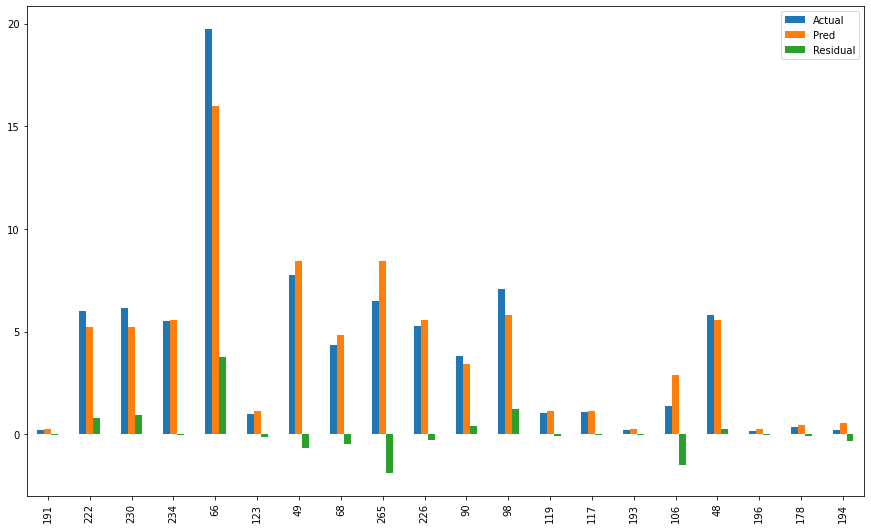

In [62]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()